# Figures of theory-kernel-analysis project

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Figure 2

(-0.5, 33.5, 5.5, -0.5)

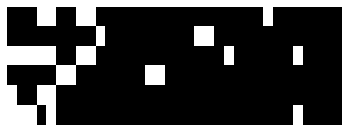

In [3]:
df = pd.read_csv('../data/Cordaro2008ref.tsv', sep='\t', index_col=0)
plt.imshow(df, cmap='gray', aspect=2)
plt.axis('off')

(-0.5, 33.5, 2.5, -0.5)

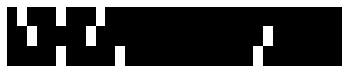

In [4]:
s = np.zeros((3, df.shape[1]))
s[0, [1, 5, 9]] = 1
s[1, [2, 8, 26]] = 1
s[2, [5, 11, 25]] = 1

plt.imshow(s, cmap='gray', aspect=2)
plt.axis('off')

(0.6, 1.1)

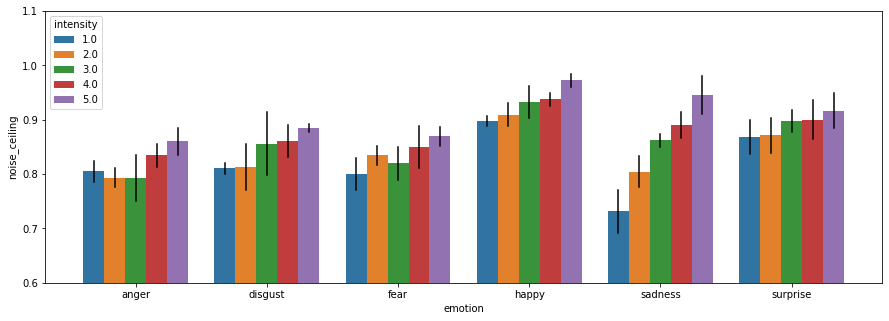

In [5]:
nc = pd.read_csv('../data/noise_ceilings.tsv', sep='\t', index_col=0)
nc = nc.query("participant_id == 'between_subjects' & intensity != 0")
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.barplot(x='emotion', y='noise_ceiling', hue='intensity', data=nc, ax=ax)
idx = 0
for i, container in enumerate(ax.containers):
    for ii, bar in enumerate(container.get_children()):
        mid = bar.xy[0] + bar.get_width() / 2
        sd = nc.sort_values(['intensity']).iloc[idx, -1]
        ax.plot([mid, mid], [bar.get_height()-sd*2, bar.get_height()+sd*2], c='k')
        idx += 1
        
ax.set_ylim(0.6, 1.1)

## Figure 3

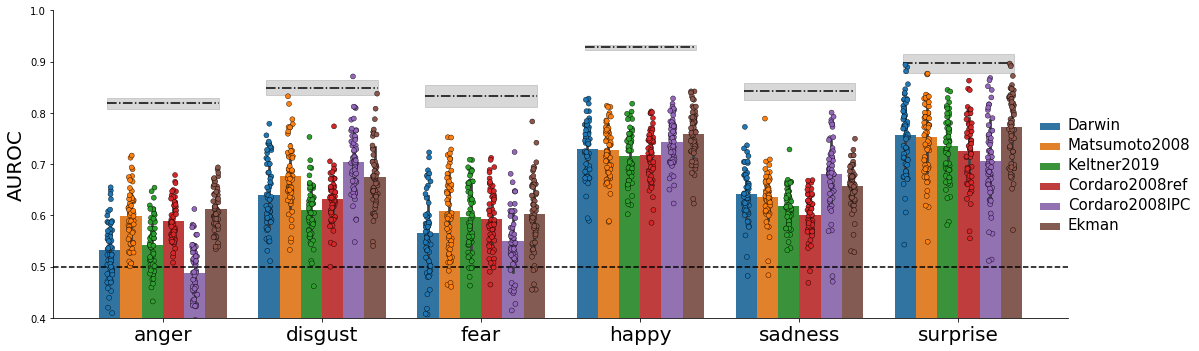

In [6]:
ymin = 0.4
ymax = 1
chance_level = .5

df = pd.read_csv('../results/scores.tsv', sep='\t', index_col=0)
nc = pd.read_csv('../data/noise_ceilings.tsv', sep='\t', index_col=0)
nc = nc.query("participant_id == 'between_subjects' & intensity == 0")

g = sns.catplot(x='emotion', y='score', data=df, hue='mapping',
                kind="bar", aspect=3, height=5, ci='sd')
g._legend.set_title('')
plt.setp(g._legend.get_texts(), fontsize=15)

ax = sns.stripplot(x='emotion', y='score', hue='mapping',
              edgecolor='black', linewidth=0.4, data=df,
              dodge=True, jitter=True)

ax.set_xlabel('')
ax.set_ylabel('AUROC', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)

n_tk = df['mapping'].unique().size
for i in range(6):
    this_nc = np.array([nc['noise_ceiling'].iloc[i]] * 6)
    this_sd = np.array([nc['sd'].iloc[i]] * 6)
    plt.plot(np.linspace(i-0.35, i+0.35, num=6), this_nc, c='k', ls='-.')
    plt.fill_between(
        np.linspace(i-0.35, i+0.35, num=6),
        this_nc - this_sd, this_nc + this_sd,
        color='gray', alpha=0.3
)

ax = plt.gca()
ax.set_ylim(ymin, ymax)
ax.axhline(chance_level, c='k', ls='--')
ax.legend_.remove()
plt.savefig('Figure4.png')

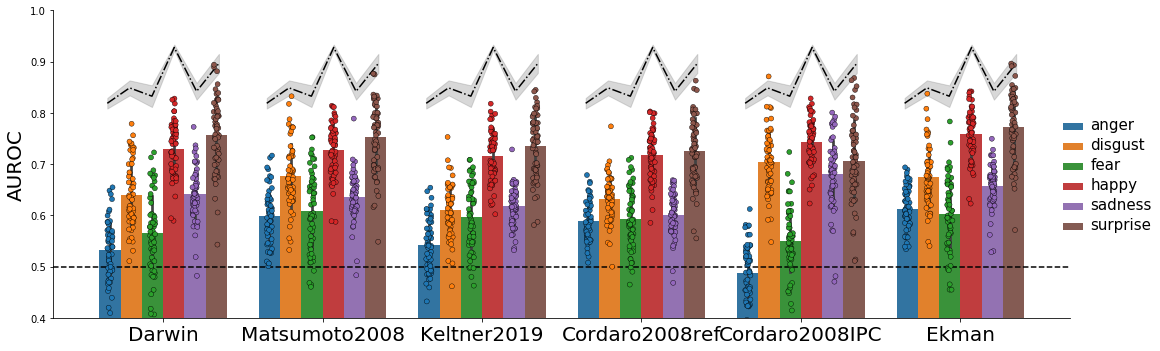

In [7]:
ymin = 0.4
ymax = 1
chance_level = .5

df = pd.read_csv('../results/scores.tsv', sep='\t', index_col=0)
nc = pd.read_csv('../data/noise_ceilings.tsv', sep='\t', index_col=0)
nc = nc.query("participant_id == 'between_subjects' & intensity == 0")

g = sns.catplot(x='mapping', y='score', data=df, hue='emotion',
                kind="bar", aspect=3, height=5, ci='sd')
g._legend.set_title('')
plt.setp(g._legend.get_texts(), fontsize=15)

ax = sns.stripplot(x='mapping', y='score', hue='emotion',
              edgecolor='black', linewidth=0.4, data=df,
              dodge=True, jitter=True)

ax.set_xlabel('')
ax.set_ylabel('AUROC', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)

n_emo = df['emotion'].unique().size
for i in range(n_tk):
    this_nc = nc['noise_ceiling']
    this_sd = nc['sd']
    plt.plot(np.linspace(i-0.35, i+0.35, num=6), this_nc, c='k', ls='-.')
    plt.fill_between(
        np.linspace(i-0.35, i+0.35, num=6),
        this_nc - this_sd, this_nc + this_sd,
        color='gray', alpha=0.3
)

ax = plt.gca()
ax.set_ylim(ymin, ymax)
ax.axhline(chance_level, c='k', ls='--')
ax.legend_.remove()
plt.savefig('Figure4b.png')

In [8]:
nc = pd.read_csv('../data/noise_ceilings.tsv', sep='\t', index_col=0)
nc = nc.query("participant_id == 'between_subjects' & intensity != 0")

df_int = pd.read_csv('../results/score_per_intensity_quantile.tsv', sep='\t', index_col=0)
g = sns.catplot(x='emotion', y='score', data=df_int, hue='intensity', row='mapping',
                kind="bar", aspect=3, height=5, ci='sd')

g._legend.set_title(' intensity\n quantile')
plt.setp(g._legend.get_title(), fontsize=15)
plt.setp(g._legend.get_texts(), fontsize=15)
for i, ax in enumerate(g.axes.flatten()):
    ax.set_title(df['mapping'].unique()[i], fontsize=20)
    for ii, emo in enumerate(nc['emotion'].unique()):
        this_nc = nc.loc[nc['emotion'] == emo, 'noise_ceiling']
        this_sd = nc.loc[nc['emotion'] == emo, 'sd']
        ax.plot(np.linspace(ii-0.4, ii+0.4, num=5), this_nc, c='k', ls='-.')
        ax.fill_between(
            np.linspace(ii-0.4, ii+0.4, num=5),
            this_nc - this_sd, this_nc + this_sd,
            color='gray', alpha=0.3
        )
        ax.set_ylim(ymin, ymax)
        ax.axhline(0.5, ls='--', c='k')
        ax.set_ylabel("AUROC", fontsize=20)

plt.subplots_adjust(hspace=0.2)
fig = plt.gcf()
fig.tight_layout()
fig.savefig('Figure7.png')
plt.close()

In [22]:
subs = [f'sub-{str(i+1).zfill(2)}' for i in range(60)]
dfs = []
for sub in subs:
    df = pd.read_csv(f'../data/ratings/{sub}_ratings.tsv', sep='\t', index_col=0).iloc[:, :-2]
    dfs.append(df)

df = pd.concat(dfs, axis=0)

In [33]:
from sklearn.manifold import MDS
mds = MDS()
mds_values = mds.fit_transform(df.drop_duplicates().values)

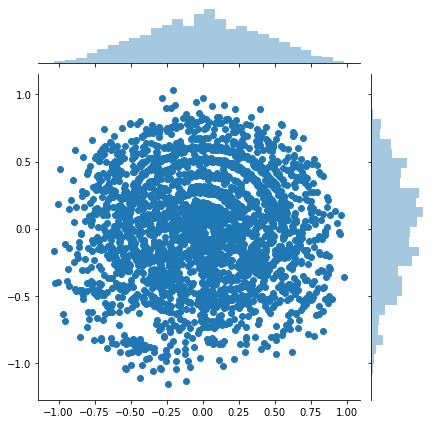

In [34]:
sns.jointplot(x=mds_values[:, 0], y=mds_values[:, 1])

In [40]:
import sys
sys.path.append('../src')
from mappings import MAPPINGS

t_df = {t: pd.read_csv(f'../data/{t}.tsv', sep='\t', index_col=0) for t in MAPPINGS.keys()}
t_df

{'Darwin':           AU01  AU02L  AU02R  AU04  AU05  AU06L  AU06R  AU07L  AU07R  AU09  \
 anger      0.0    0.0    0.0   1.0   1.0    0.0    0.0    0.0    0.0   0.0   
 disgust    0.0    0.0    0.0   0.0   0.0    0.0    0.0    0.0    0.0   0.0   
 disgust    0.0    0.0    0.0   0.0   0.0    0.0    0.0    0.0    0.0   0.0   
 fear       1.0    1.0    1.0   0.0   1.0    0.0    0.0    0.0    0.0   0.0   
 happy      0.0    0.0    0.0   0.0   0.0    1.0    1.0    0.0    0.0   0.0   
 sadness    1.0    0.0    0.0   0.0   0.0    0.0    0.0    0.0    0.0   0.0   
 surprise   1.0    1.0    1.0   0.0   1.0    0.0    0.0    0.0    0.0   0.0   
 surprise   1.0    1.0    1.0   0.0   1.0    0.0    0.0    0.0    0.0   0.0   
 
           ...  AU20R  AU22  AU23  AU24  AU25  AU26  AU27  AU38  AU39  AU43  
 anger     ...    0.0   0.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0  
 disgust   ...    0.0   1.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  
 disgust   ...    0.0   1.0   0.0   0.0   0

In [81]:
preds = pd.read_csv('../results/predictions.tsv', sep='\t', index_col=0)#.query("mapping == 'Darwin'")

In [128]:
from sklearn.metrics import confusion_matrix
dpreds = preds.iloc[:, :6].columns[preds.iloc[:, :6].values.argmax(axis=1)].to_list()
true = preds['y_true'].to_list()
cmat = confusion_matrix(true, dpreds, normalize='true').round(3)
cmat

array([[0.296, 0.249, 0.12 , 0.284, 0.027, 0.023],
       [0.229, 0.281, 0.143, 0.29 , 0.039, 0.018],
       [0.273, 0.117, 0.289, 0.251, 0.037, 0.033],
       [0.138, 0.056, 0.125, 0.639, 0.014, 0.027],
       [0.347, 0.101, 0.175, 0.267, 0.083, 0.027],
       [0.165, 0.096, 0.432, 0.168, 0.025, 0.114]])

In [133]:
corr_pos = cmat[3, 3] + cmat[5, 5]
corr_neg = cmat[0, 0] + cmat[1, 1] + cmat[2, 2] + cmat[4, 4]
conf_within_neg = (cmat[0, [1, 2, 4]].mean() + cmat[1, [0, 2, 4]].mean() + cmat[2, [0, 1, 4]].mean() + cmat[4, [0, 1, 2]].mean()) / 4
print(conf_within_neg)
conf_within_pos = (cmat[3, 5] + cmat[5, 3]) / 2
print(conf_within_pos)

conf_neg_as_pos = (cmat[0, [3, 5]].mean() + cmat[1, [3, 5]].mean() + cmat[2, [3, 5]].mean() + cmat[4, [3, 5]].mean()) / 4
conf_pos_as_neg = (cmat[3, [0, 1, 2, 4]].mean() + cmat[5, [0, 1, 2, 4]].mean()) / 2
print(conf_neg_as_pos)
print(conf_pos_as_neg)


0.15475
0.0975
0.149125
0.13137500000000002


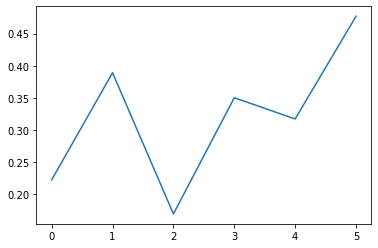

In [138]:
plt.plot(np.diag(confusion_matrix(true, dpreds, normalize='pred').round(3)))

In [156]:
for name, df in t_df.items():
    print(name)
    print(df.sum(axis=1).mean())

Darwin
4.5
Matsumoto2008
2.85
Keltner2019
6.5
Cordaro2008ref
4.833333333333333
Cordaro2008IPC
6.428571428571429
Ekman
4.313725490196078
